In [ ]:
# KMeans

In [1]:
import pandas as pd


In [2]:
wine = pd.read_csv(r"D:\Documentos-Backu-up-07-06-2022\Análise de Dados com Python e Pandas\pandas_for_everyone\data\wine.csv")

In [3]:
print(wine.head())

   Cultivar  Alcohol  Malic acid   Ash  Alcalinity of ash    Magnesium  \
0         1    14.23        1.71  2.43                 15.6        127   
1         1    13.20        1.78  2.14                 11.2        100   
2         1    13.16        2.36  2.67                 18.6        101   
3         1    14.37        1.95  2.50                 16.8        113   
4         1    13.24        2.59  2.87                 21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline              
0             5.64  1.04                          

In [5]:
wine = wine.drop('Cultivar', axis=1)
print(wine.head())

   Alcohol  Malic acid   Ash  Alcalinity of ash    Magnesium  Total phenols  \
0    14.23        1.71  2.43                 15.6        127           2.80   
1    13.20        1.78  2.14                 11.2        100           2.65   
2    13.16        2.36  2.67                 18.6        101           2.80   
3    14.37        1.95  2.50                 16.8        113           3.85   
4    13.24        2.59  2.87                 21.0        118           2.80   

   Flavanoids  Nonflavanoid phenols  Proanthocyanins  Color intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280/OD315 of diluted wines  Proline          

In [7]:
from sklearn.cluster import KMeans

In [12]:
Kmeans = KMeans(n_clusters=3, random_state=42).fit(wine.values)

In [13]:
print(Kmeans)

KMeans(n_clusters=3, random_state=42)


In [14]:
import numpy as np
print(np.unique(Kmeans.labels_, return_counts=True))

(array([0, 1, 2]), array([69, 47, 62], dtype=int64))


In [17]:
kmeans_3 = pd.DataFrame(Kmeans.labels_, columns=['cluster'])
print(kmeans_3.head())

   cluster
0        1
1        1
2        1
3        1
4        2


In [ ]:
# Redução de dimensões com PCA

In [18]:
from sklearn.decomposition import PCA

In [19]:
pca = PCA(n_components=2).fit(wine)

In [20]:
pca_trans = pca.transform(wine)

In [22]:
pca_trans_df = pd.DataFrame(pca_trans, columns=['pca1','pca2'])

In [23]:
kmeans_3 = pd.concat([kmeans_3, pca_trans_df], axis=1)

In [24]:
print(kmeans_3.head())

   cluster        pca1       pca2
0        1  318.562979  21.492131
1        1  303.097420  -5.364718
2        1  438.061133  -6.537309
3        1  733.240139   0.192729
4        2  -11.571428  18.489995


In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

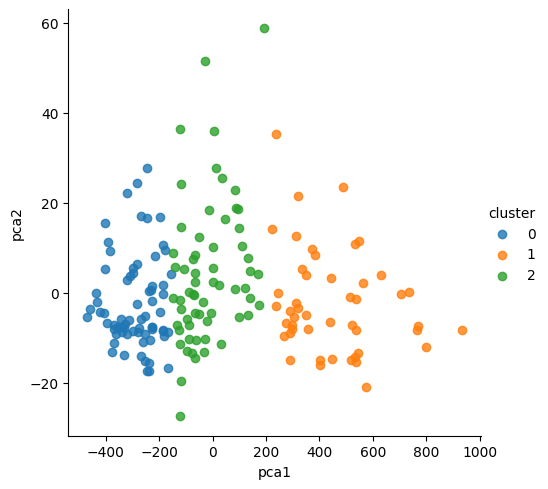

In [26]:
fig = sns.lmplot(x = 'pca1', y = 'pca2', data=kmeans_3, hue='cluster', fit_reg=False)
plt.show()

In [27]:
wine_all = pd.read_csv(r"D:\Documentos-Backu-up-07-06-2022\Análise de Dados com Python e Pandas\pandas_for_everyone\data\wine.csv")

In [28]:
print(wine_all.head())

   Cultivar  Alcohol  Malic acid   Ash  Alcalinity of ash    Magnesium  \
0         1    14.23        1.71  2.43                 15.6        127   
1         1    13.20        1.78  2.14                 11.2        100   
2         1    13.16        2.36  2.67                 18.6        101   
3         1    14.37        1.95  2.50                 16.8        113   
4         1    13.24        2.59  2.87                 21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline              
0             5.64  1.04                          

In [33]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns

In [10]:
wine_all = pd.read_csv(r"D:\Documentos-Backu-up-07-06-2022\Análise de Dados com Python e Pandas\pandas_for_everyone\data\wine.csv")

In [25]:
pca_all = PCA(n_components=2).fit(wine_all)
pca_all_trans = pca_all.transform(wine_all)
pca_all_trans_df = pd.DataFrame(pca_all_trans, columns=['pca_all_1', 'pca_all_2'])



In [26]:
Kmeans = KMeans(n_clusters=3, random_state=42).fit(wine_all.values)

In [29]:
kmeans_3 = pd.DataFrame(Kmeans.labels_, columns=['cluster'])

In [30]:
kmeans_3 = pd.concat([kmeans_3, pca_all_trans_df, wine_all['Cultivar']], axis=1)

NameError: name 'plt' is not defined

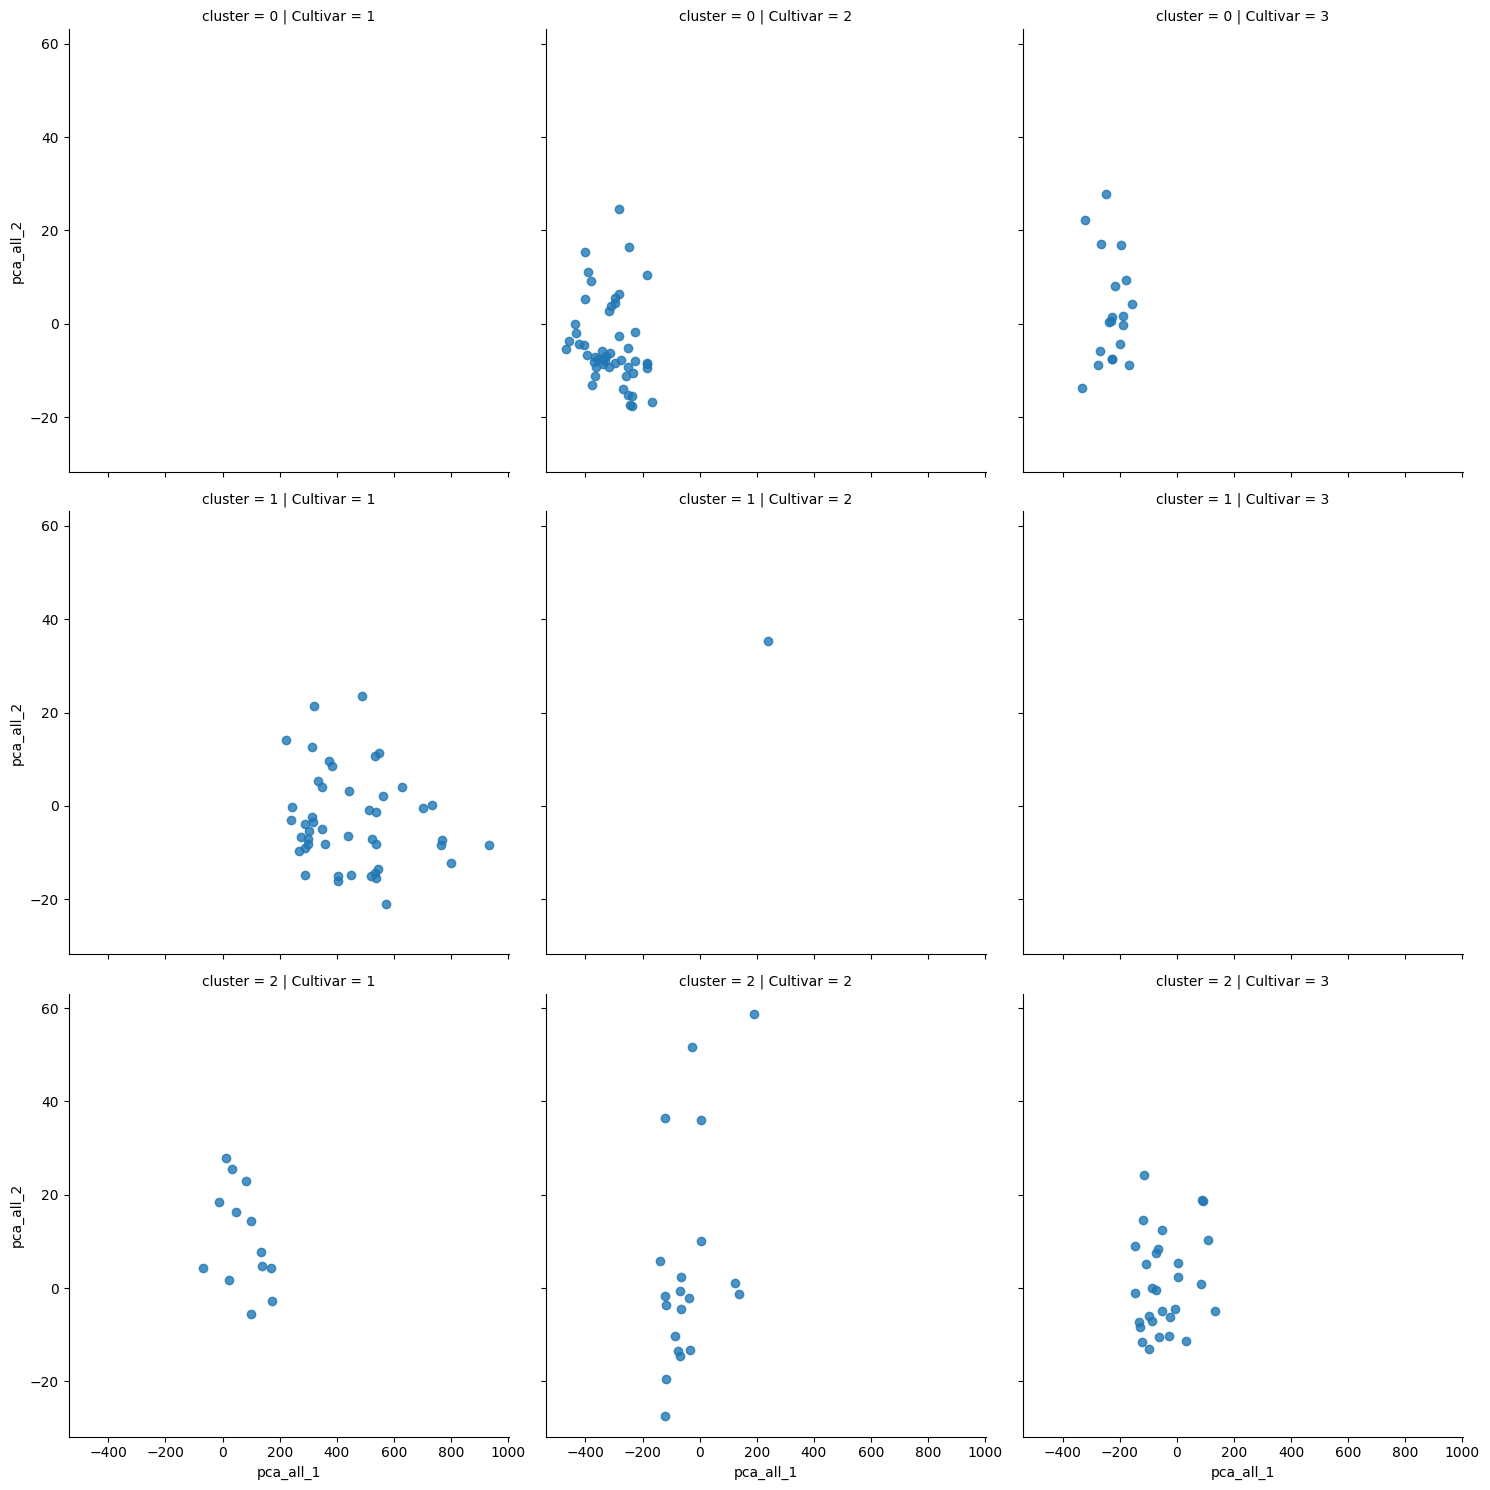

In [35]:
with sns.plotting_context(font_scale=5):
    fig = sns.lmplot(x='pca_all_1', 
                     y='pca_all_2',
                     data=kmeans_3,
                     row='cluster', col='Cultivar',
                     fit_reg=False
                     )
plt.show()

In [36]:
print(pd.crosstab(kmeans_3['cluster'],
                  kmeans_3['Cultivar'],
                  margins=True
                  ))

Cultivar   1   2   3  All
cluster                  
0          0  50  19   69
1         46   1   0   47
2         13  20  29   62
All       59  71  48  178


In [ ]:
# Clustering hireráquico 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy

In [4]:
wine = pd.read_csv(r"D:\Documentos-Backu-up-07-06-2022\Análise de Dados com Python e Pandas\pandas_for_everyone\data\wine.csv")
wine = wine.drop('Cultivar', axis=1)

In [ ]:
# Clustering completo

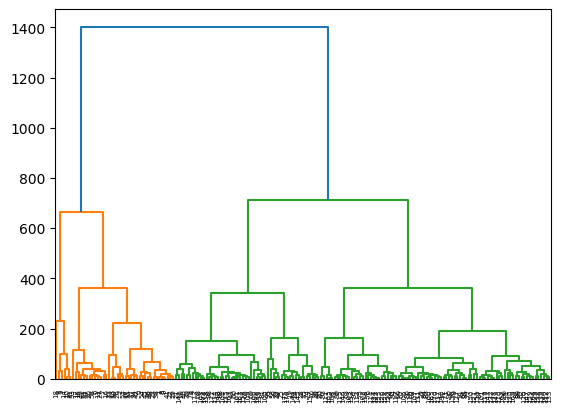

In [5]:
wine_complete = hierarchy.complete(wine)
fig = plt.figure()
dn = hierarchy.dendrogram(wine_complete)
plt.show()

In [10]:
# Clustering simples

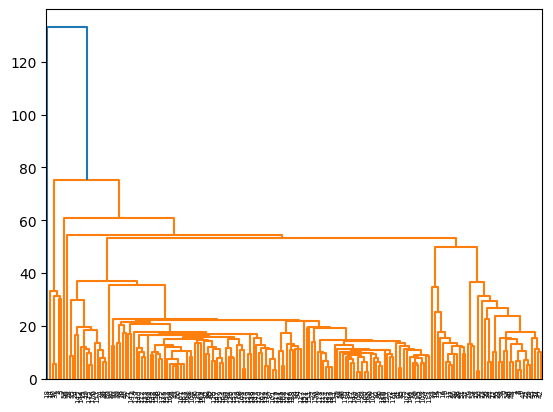

In [6]:
wine_single = hierarchy.single(wine)
fig = plt.figure()
dn = hierarchy.dendrogram(wine_single)
plt.show()

In [ ]:
# Clustering com médias

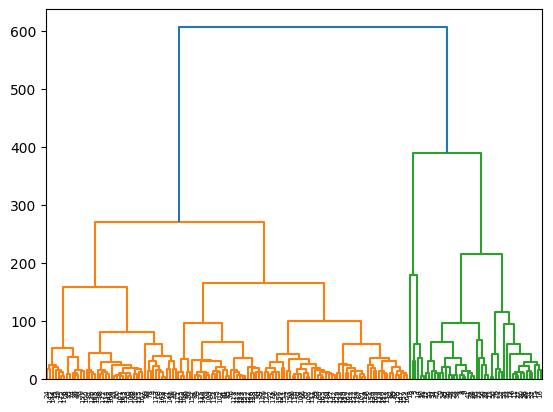

In [7]:
wine_average = hierarchy.average(wine)
fig = plt.figure()
dn = hierarchy.dendrogram(wine_average)
plt.show()

In [ ]:
# Clustering com centroide

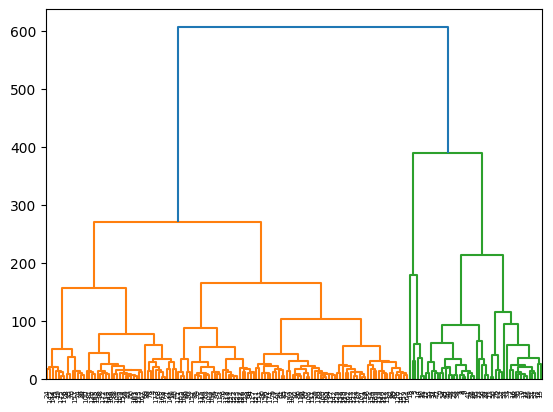

In [8]:
wine_centroide = hierarchy.centroid(wine)
fig = plt.figure()
dn = hierarchy.dendrogram(wine_centroide)
plt.show()

In [ ]:
# Definindo manualmente o limite

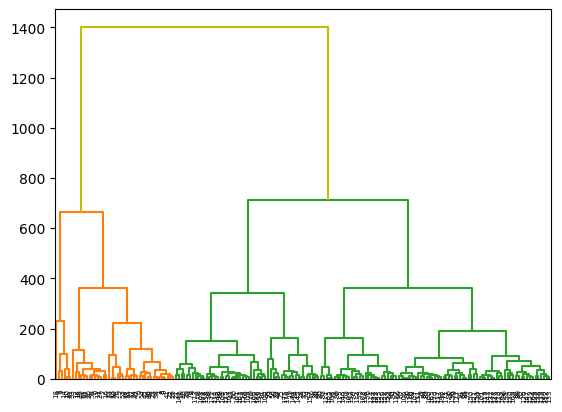

In [10]:
wine_complete = hierarchy.complete(wine)
fig = plt.figure()
dn = hierarchy.dendrogram(    
    wine_complete,
    color_threshold=0.7 * max(wine_complete[:,2]),
    above_threshold_color='y')
plt.show()